___
# Ciência dos Dados - PROJETO 1

## COLOQUE AQUI SEU NOME
Vitor Leandro Pereira

## TÍTULO DO SEU PROJETO
A influencia do rendimento domiciliar percapita na qualidade de vida

___
## Introdução

Descreva aqui o que pretende analisar!

Capriche no português!! 
Se quiser pode utilizar pesquisas semelhantes publicadas em sites confiáveis!!

QUAIS SÃO OS REFLEXOS DA RENDA NA QUALIDADE DE VIDA DAS PESSOAS ?


___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Vitão\Downloads


In [3]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
valores=pd.read_csv('DOM2014csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [4]:
dados=pd.DataFrame({
    'Rendimento_mensal_domiciliar' :valores.V4614,
    'Faixa_do_rendimento_mensal_domiciliar_per_capita' :valores.V4622,
    'Tem_água_filtrada':valores.V0224,
    'Forma_de_iluminação_do_domicílio' :valores.V0219,
#    'Tem_televisão_em_preto_e_branco' :valores.V0227,
    'Tem_televisão_em_cores' :valores.V0226,
    'Total_de_moradores' :valores.V0105,
    
    
    })
dados=dados[['Rendimento_mensal_domiciliar','Total_de_moradores','Faixa_do_rendimento_mensal_domiciliar_per_capita','Tem_água_filtrada','Forma_de_iluminação_do_domicílio','Tem_televisão_em_cores']]
dados.Faixa_do_rendimento_mensal_domiciliar_per_capita=dados.Faixa_do_rendimento_mensal_domiciliar_per_capita.astype('category')
dados.Faixa_do_rendimento_mensal_domiciliar_per_capita.cat.categories=('Zero salários mínimos','Zero-1/4 salários mínimos','1/4-1/2 salário mínimo','1/2-1 salário mínimo','1-2 salários mínimos','2-3 salários mínimos','3-5 salários mínimos','5 ou mais salários mínimos','SD')
dados.Tem_água_filtrada=dados.Tem_água_filtrada.astype('category')
dados.Tem_água_filtrada.cat.categories=('Sim','Não')
dados.Forma_de_iluminação_do_domicílio=dados.Forma_de_iluminação_do_domicílio.astype('category')
dados.Forma_de_iluminação_do_domicílio.cat.categories=('Elétrica','Óleo ou Gás','Outra forma')


dados[(dados.Total_de_moradores<20000)].dropna()
#dados.Tem_televisão_em_preto_e_branco=dados.Tem_televisão_em_preto_e_branco.astype('category')
#dados.Tem_televisão_em_preto_e_branco.cat.categories=('Sim','Não')
dados.Tem_televisão_em_cores=dados.Tem_televisão_em_cores.astype('category')
dados.Tem_televisão_em_cores.cat.categories=('Sim','Não')
dados[(dados.Rendimento_mensal_domiciliar<20000)].dropna()



,Rendimento_mensal_domiciliar,Total_de_moradores,Faixa_do_rendimento_mensal_domiciliar_per_capita,Tem_água_filtrada,Forma_de_iluminação_do_domicílio,Tem_televisão_em_cores
0,1500.0,3.0,1/2-1 salário mínimo,Não,Elétrica,Sim
1,2300.0,2.0,1-2 salários mínimos,Sim,Elétrica,Sim
2,724.0,1.0,1/2-1 salário mínimo,Sim,Elétrica,Sim
3,8500.0,5.0,2-3 salários mínimos,Não,Elétrica,Sim
4,3422.0,4.0,1-2 salários mínimos,Sim,Elétrica,Sim
5,1700.0,2.0,1-2 salários mínimos,Sim,Elétrica,Sim
6,16100.0,5.0,3-5 salários mínimos,Não,Elétrica,Sim
7,2800.0,3.0,1-2 salários mínimos,Não,Elétrica,Sim
9,4724.0,2.0,3-5 salários mínimos,Sim,Elétrica,Sim
10,4024.0,5.0,1-2 salários mínimos,Sim,Elétrica,Sim


In [5]:
#dados = pd.crosstab(dados.Total_de_moradores, dados.Rendimento_mensal_domiciliar)
#dados.plot(kind='bar', color=('yellow', 'salmon'))
#plt.ylabel('Frequência Absoluta')
#plt.xlabel('Faixa do rendimento mensal domiciliar per capita')
#plt.title("Frequencia de TV's por faixa de renda" )

#plot = dados.Rendimento_mensal_domiciliar.plot.hist(bins=faixa,title='GRAFICO DE COLUNAS', figsize=(6, 6), alpha=0.9)



In [ ]:
#quantitativo:
    #media de pessoas por residencia por faixa de rendimento mensal per capita

Tem_televisão_em_cores,Sim,Não
count,9.000000,9.000000
mean,12775.666667,417.222222
std,11659.547397,439.376768
min,704.000000,47.000000
25%,6267.000000,91.000000
50%,7010.000000,171.000000
75%,16264.000000,654.000000
max,32537.000000,1321.000000


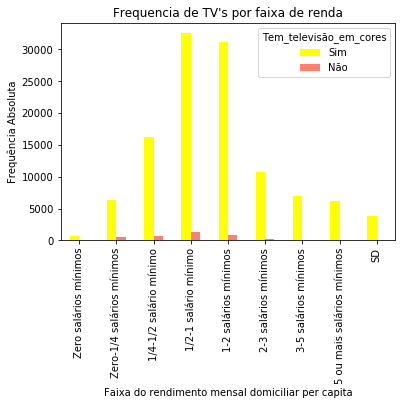

In [6]:

dados=dados.iloc[:-1,:]
dados = pd.crosstab(dados.Faixa_do_rendimento_mensal_domiciliar_per_capita, dados.Tem_televisão_em_cores)
dados.plot(kind='bar', color=('yellow', 'salmon'))
plt.ylabel('Frequência Absoluta')
plt.xlabel('Faixa do rendimento mensal domiciliar per capita')
plt.title("Frequencia de TV's por faixa de renda" )

dados.iloc[:-1,:]
dados.describe()

___
## Conclusão 

Descreva aqui suas conclusões!